In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #use to make plots and graphs
import seaborn as sns  #data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#loading the data from csv file to pandas dataframe
insurance_dataset = pd.read_csv(r"C:\Users\bajaj\Downloads\archive (22)\insurance.csv")    

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(insurance_dataset)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       0       1  16884.92
1      18    0  33.8         1       1       0   1725.55
2      28    0  33.0         3       1       0   4449.46
3      33    0  22.7         0       1       3  21984.47
4      32    0  28.9         0       1       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       1       3  10600.55
1334   18    1  31.9         0       1       2   2205.98
1335   18    1  36.9         0       1       0   1629.83
1336   21    1  25.8         0       1       1   2007.95
1337   61    1  29.1         0       0       3  29141.36

[1338 rows x 7 columns]


In [9]:
# Function to randomly replace values with NaNs
def randomly_replace_values(dataset, replace_fraction=0.2):
    # Iterate over each column
    for col in dataset.columns:
        num_to_replace = int(replace_fraction * len(dataset))
        indices = np.random.choice(dataset.index, num_to_replace, replace=False)
        dataset.loc[indices, col] = np.nan
    return dataset

# Introduce NaN values
insurance_dataset_nans = randomly_replace_values(insurance_dataset.copy(), replace_fraction=0.3)

print("\nDataset after introducing NaNs:")
print(insurance_dataset_nans)


Dataset after introducing NaNs:
       age  sex   bmi  children  smoker  region  expenses
0      NaN  NaN  27.9       0.0     0.0     1.0  16884.92
1     18.0  NaN  33.8       1.0     1.0     0.0   1725.55
2      NaN  0.0  33.0       NaN     1.0     0.0       NaN
3      NaN  NaN   NaN       0.0     1.0     3.0       NaN
4     32.0  NaN   NaN       0.0     NaN     NaN   3866.86
...    ...  ...   ...       ...     ...     ...       ...
1333  50.0  NaN  31.0       3.0     1.0     3.0  10600.55
1334  18.0  1.0  31.9       0.0     1.0     NaN   2205.98
1335  18.0  NaN  36.9       NaN     1.0     0.0   1629.83
1336   NaN  1.0  25.8       0.0     NaN     1.0       NaN
1337  61.0  1.0   NaN       0.0     0.0     3.0  29141.36

[1338 rows x 7 columns]


In [10]:
# Fill empty spaces (NaNs) with column-wise maximums
for col in insurance_dataset_nans.columns:
    if insurance_dataset_nans[col].dtype in ['float64', 'int64']:  # For numeric columns
        max_value = insurance_dataset_nans[col].max(skipna=True)  # Find maximum ignoring NaNs
        insurance_dataset_nans[col].fillna(max_value, inplace=True)
    else:  # For non-numeric columns
        max_value = insurance_dataset_nans[col].dropna().max()  # Find lexicographical maximum ignoring NaNs
        insurance_dataset_nans[col].fillna(max_value, inplace=True)

# Verify there are no NaN or empty spaces left
print("\nDataset after replacing NaNs with maximum values:")
print(insurance_dataset_nans)



Dataset after replacing NaNs with maximum values:
       age  sex   bmi  children  smoker  region  expenses
0     64.0  1.0  27.9       0.0     0.0     1.0  16884.92
1     18.0  1.0  33.8       1.0     1.0     0.0   1725.55
2     64.0  0.0  33.0       5.0     1.0     0.0  62592.87
3     64.0  1.0  53.1       0.0     1.0     3.0  62592.87
4     32.0  1.0  53.1       0.0     1.0     3.0   3866.86
...    ...  ...   ...       ...     ...     ...       ...
1333  50.0  1.0  31.0       3.0     1.0     3.0  10600.55
1334  18.0  1.0  31.9       0.0     1.0     3.0   2205.98
1335  18.0  1.0  36.9       5.0     1.0     0.0   1629.83
1336  64.0  1.0  25.8       0.0     1.0     1.0  62592.87
1337  61.0  1.0  53.1       0.0     0.0     3.0  29141.36

[1338 rows x 7 columns]


In [11]:
# Check for missing values again
print("\nMissing values after imputation:")
print(insurance_dataset_nans.isnull().sum())


Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [12]:
#statistical measures of the dataset
insurance_dataset_nans.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,46.454410,0.651719,37.423169,2.276532,0.857250,1.920030,28093.892728
std,16.477761,0.476604,11.469208,2.059998,0.349949,1.183419,24806.101134
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,31.000000,0.000000,28.100000,0.000000,1.000000,1.000000,6692.370000
50%,49.000000,1.000000,34.100000,2.000000,1.000000,2.000000,13978.155000
75%,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,62592.870000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,62592.870000


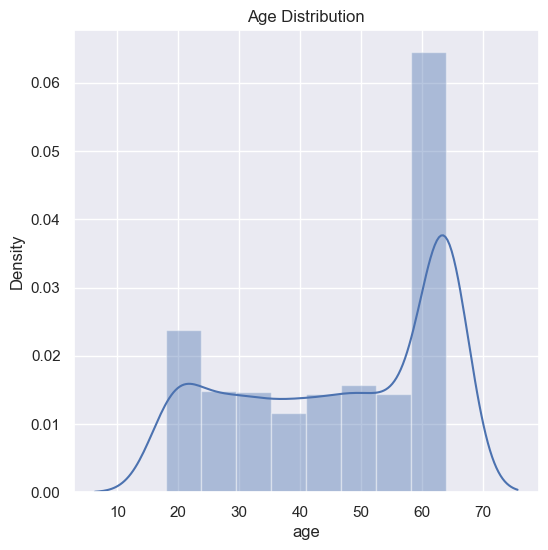

In [13]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['age'])
plt.title('Age Distribution')
plt.show()

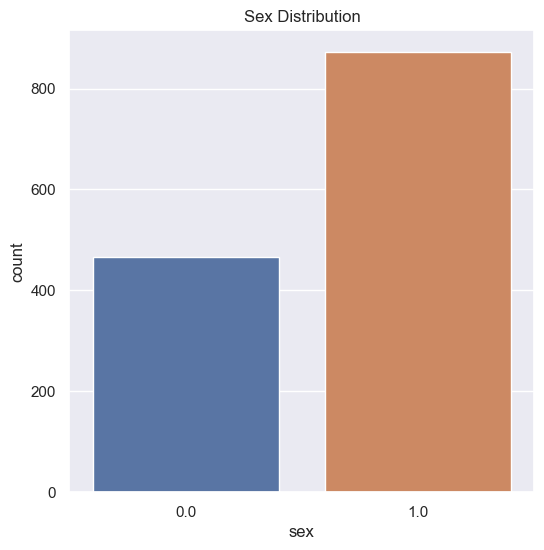

In [14]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset_nans)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance_dataset_nans['sex'].value_counts()

sex
1.0    872
0.0    466
Name: count, dtype: int64

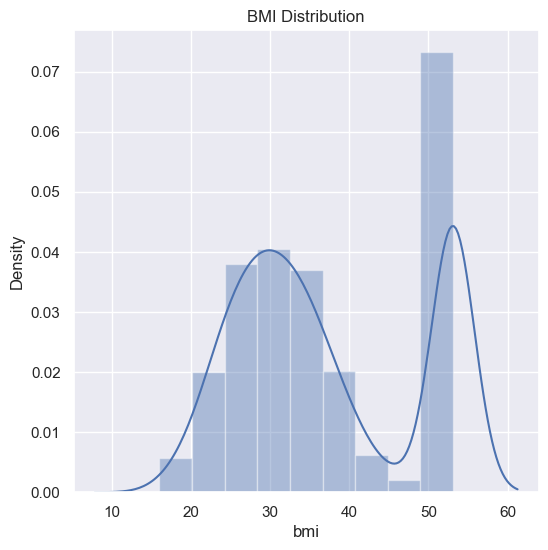

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['bmi'])
plt.title('BMI Distribution')
plt.show()

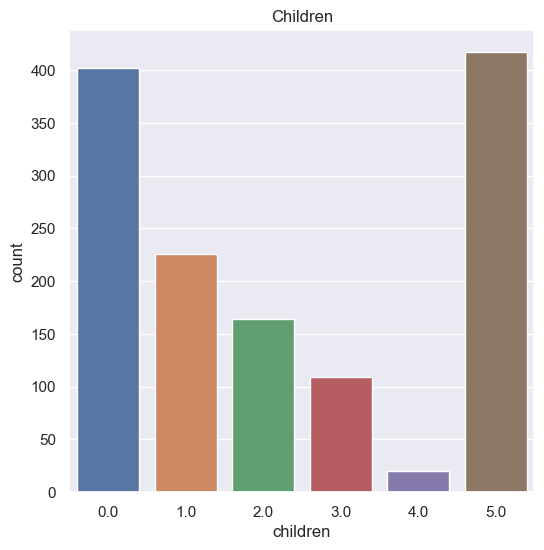

In [17]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset_nans)
plt.title('Children')
plt.show()

In [18]:
insurance_dataset_nans['children'].value_counts()     

children
5.0    417
0.0    402
1.0    226
2.0    164
3.0    109
4.0     20
Name: count, dtype: int64

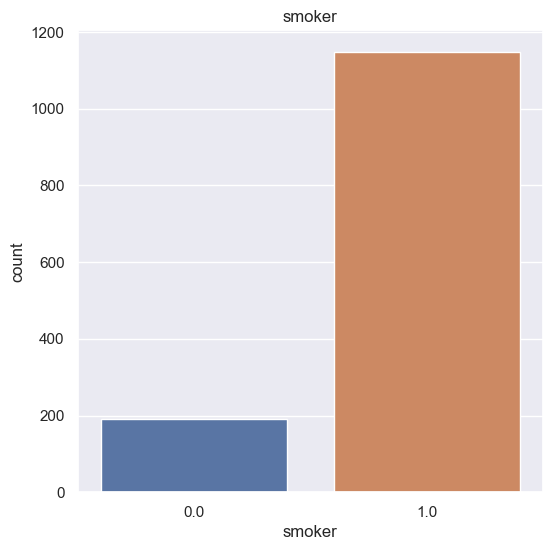

In [19]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset_nans)
plt.title('smoker')
plt.show()

In [20]:
insurance_dataset_nans['smoker'].value_counts()

smoker
1.0    1147
0.0     191
Name: count, dtype: int64

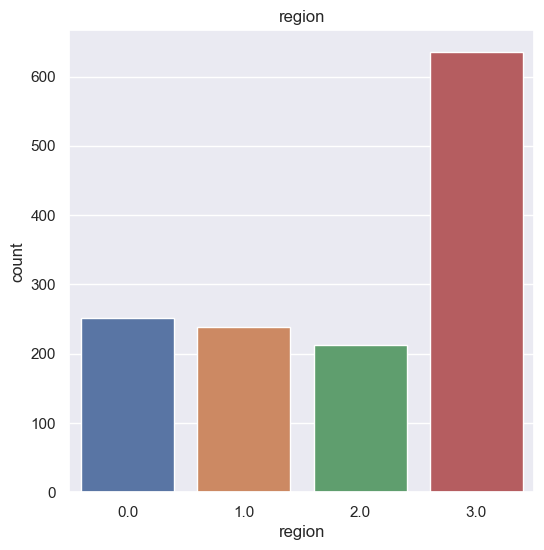

In [21]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset_nans)
plt.title('region')
plt.show()

In [22]:
insurance_dataset_nans['region'].value_counts()

region
3.0    635
0.0    252
1.0    238
2.0    213
Name: count, dtype: int64

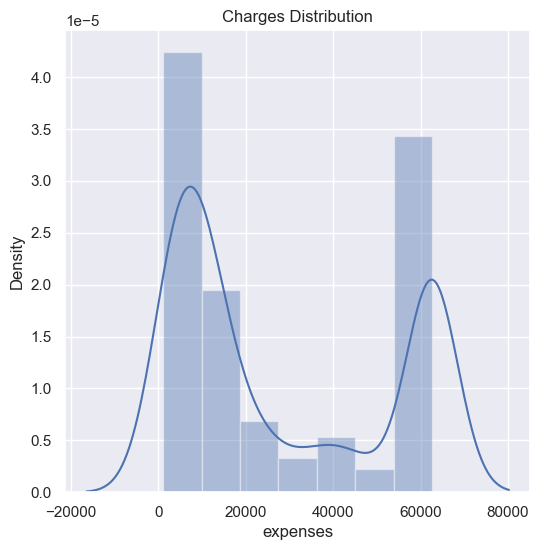

In [23]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset_nans['expenses'])
plt.title('Charges Distribution')
plt.show()

Splitting the Feature and Target

In [24]:
X=insurance_dataset_nans.drop(columns='expenses',axis=1)
y=insurance_dataset_nans['expenses']
print(X)

       age  sex   bmi  children  smoker  region
0     64.0  1.0  27.9       0.0     0.0     1.0
1     18.0  1.0  33.8       1.0     1.0     0.0
2     64.0  0.0  33.0       5.0     1.0     0.0
3     64.0  1.0  53.1       0.0     1.0     3.0
4     32.0  1.0  53.1       0.0     1.0     3.0
...    ...  ...   ...       ...     ...     ...
1333  50.0  1.0  31.0       3.0     1.0     3.0
1334  18.0  1.0  31.9       0.0     1.0     3.0
1335  18.0  1.0  36.9       5.0     1.0     0.0
1336  64.0  1.0  25.8       0.0     1.0     1.0
1337  61.0  1.0  53.1       0.0     0.0     3.0

[1338 rows x 6 columns]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) #we took 20 or 20 percent of data as testing data we took 20% test data and 80% to training data
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [26]:
#loading the Linear Regression Model
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Model Evaluation

In [27]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [28]:
from sklearn import metrics
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared vale:',r2_train)

R squared vale: 0.05995479049520647


In [29]:
#prediction on training data
test_data_prediction=regressor.predict(X_test)

In [30]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared vale:',r2_test)

R squared vale: 0.04682796725702243


Building a Predictive Model

In [31]:
# Prediction
input_data=(31,1,25.74,0,1,0) # charges: 3756.6216
#change input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD', prediction[0])

[25665.43121446]
The insurance cost is USD 25665.43121445657


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume these are your actual and predicted values (example data)
actual_charges = [3756.6216]  # Replace with actual values of insurance cost
predicted_charges = prediction  # Predicted value from the regressor

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_charges, predicted_charges)

# Calculate Mean Squared Error
mse = mean_squared_error(actual_charges, predicted_charges)

# Calculate Root Mean Squared Error (optional, for better interpretability)
rmse = mse ** 0.5

# Calculate R² Score
r2 = r2_score(actual_charges, predicted_charges)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 21908.80961445657
Mean Squared Error (MSE): 479995938.72250473
Root Mean Squared Error (RMSE): 21908.80961445657
R² Score: nan


In [33]:
from sklearn.metrics import mean_absolute_error

# Assume these are your actual and predicted values (example data)
actual_charges = [3756.6216]  # Replace with actual values of insurance cost
predicted_charges = prediction  # Predicted value from the regressor

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_error(actual_charges, predicted_charges) / actual_charges[0] * 100

# Accuracy percentage
accuracy = 100 - mape

print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Accuracy Percentage:", accuracy, "%")


Mean Absolute Percentage Error (MAPE): 583.2051227745848 %
Accuracy Percentage: -483.20512277458477 %


Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# Initialize Ridge Regression with a regularization parameter alpha
ridge_regressor = Ridge(alpha=1.0)  # Adjust alpha as needed     

In [36]:

# Fit the Ridge Regression model
ridge_regressor.fit(X_train, y_train)

Ridge()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [37]:
# Predictions on training data
ridge_train_predictions = ridge_regressor.predict(X_train)

In [38]:
# R² Score for training data
ridge_r2_train = r2_score(y_train, ridge_train_predictions)
print('Ridge Regression R² Score (Train):', ridge_r2_train)

Ridge Regression R² Score (Train): 0.05995126177737975


In [39]:
# Predictions on test data
ridge_test_predictions = ridge_regressor.predict(X_test)

In [40]:
# R² Score for test data
ridge_r2_test = r2_score(y_test, ridge_test_predictions)
print('Ridge Regression R² Score (Test):', ridge_r2_test)

Ridge Regression R² Score (Test): 0.04688973035737731


In [41]:
# Calculate MAE, MSE, and RMSE for Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_test_predictions)
ridge_mse = mean_squared_error(y_test, ridge_test_predictions)
ridge_rmse = ridge_mse ** 0.5
print("Ridge Regression Mean Absolute Error (MAE):", ridge_mae)
print("Ridge Regression Mean Squared Error (MSE):", ridge_mse)
print("Ridge Regression Root Mean Squared Error (RMSE):", ridge_rmse)


Ridge Regression Mean Absolute Error (MAE): 21658.205181564615
Ridge Regression Mean Squared Error (MSE): 570641818.0827265
Ridge Regression Root Mean Squared Error (RMSE): 23888.11039163053


In [42]:
# Ridge Regression on sample input data
ridge_prediction = ridge_regressor.predict(input_data_reshaped)
print('The Ridge Regression predicted insurance cost is USD', ridge_prediction[0])

The Ridge Regression predicted insurance cost is USD 25685.988719275458


In [43]:
# MAPE and Accuracy for Ridge Regression
ridge_mape = mean_absolute_error(actual_charges, ridge_prediction) / actual_charges[0] * 100
ridge_accuracy = 100 - ridge_mape
print("Ridge Regression Mean Absolute Percentage Error (MAPE):", ridge_mape, "%")
print("Ridge Regression Accuracy Percentage:", ridge_accuracy, "%")
     

Ridge Regression Mean Absolute Percentage Error (MAPE): 583.7523566194545 %
Ridge Regression Accuracy Percentage: -483.75235661945453 %


SVM as regressor

In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
# Initialize the SVR model with RBF kernel
svr_regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [46]:
# Fit the SVR model to the training data
svr_regressor.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

SVR(C=100, gamma=0.1)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [47]:
# Predictions on training data
svr_train_predictions = svr_regressor.predict(X_train)     

In [48]:
# R² Score for training data
svr_r2_train = r2_score(y_train, svr_train_predictions)
print('SVM R² Score (Train):', svr_r2_train)

SVM R² Score (Train): -0.33174936810092515


In [49]:
# Predictions on test data
svr_test_predictions = svr_regressor.predict(X_test)

In [50]:
# R² Score for test data
svr_r2_test = r2_score(y_test, svr_test_predictions)
print('SVM R² Score (Test):', svr_r2_test)   

SVM R² Score (Test): -0.24355172356889931


In [51]:
# Calculate MAE, MSE, and RMSE for SVM Regression
svr_mae = mean_absolute_error(y_test, svr_test_predictions)
svr_mse = mean_squared_error(y_test, svr_test_predictions)
svr_rmse = svr_mse ** 0.5
print("SVM Mean Absolute Error (MAE):", svr_mae)
print("SVM Mean Squared Error (MSE):", svr_mse)
print("SVM Root Mean Squared Error (RMSE):", svr_rmse)

SVM Mean Absolute Error (MAE): 20135.565772790596
SVM Mean Squared Error (MSE): 744533595.9745184
SVM Root Mean Squared Error (RMSE): 27286.14292959924


In [52]:
# SVM Regression on sample input data
svr_prediction = svr_regressor.predict(input_data_reshaped)
print('The SVM predicted insurance cost is USD', svr_prediction[0])

The SVM predicted insurance cost is USD 14160.273298741873


In [53]:
# MAPE and Accuracy for SVM Regression
svr_mape = mean_absolute_error(actual_charges, svr_prediction) / actual_charges[0] * 100
svr_accuracy = 100 - svr_mape

print("SVM Mean Absolute Percentage Error (MAPE):", svr_mape, "%")
print("SVM Accuracy Percentage:", svr_accuracy, "%")

SVM Mean Absolute Percentage Error (MAPE): 276.9416993913327 %
SVM Accuracy Percentage: -176.9416993913327 %


In [54]:
# Evaluate SVR performance with regression-specific metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R² Score
r2 = r2_score(y_test, svr_test_predictions)
print("R² Score:", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, svr_test_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, svr_test_predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)    

R² Score: -0.24355172356889931
Mean Absolute Error (MAE): 20135.565772790596
Root Mean Squared Error (RMSE): 27286.14292959924


Decision Tree as Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
     

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=2)

In [56]:
# Fit the model to the training data
dt_regressor.fit(X_train, y_train)
     

DecisionTreeRegressor(random_state=2)

In [57]:
# Predictions on training data
dt_train_predictions = dt_regressor.predict(X_train)
     

# R² Score for training data
dt_r2_train = r2_score(y_train, dt_train_predictions)
print('Decision Tree R² Score (Train):', dt_r2_train)

Decision Tree R² Score (Train): 0.9326346659472978


In [58]:
# Predictions on test data
dt_test_predictions = dt_regressor.predict(X_test)
     

# R² Score for test data
dt_r2_test = r2_score(y_test, dt_test_predictions)
print('Decision Tree R² Score (Test):', dt_r2_test)

Decision Tree R² Score (Test): -1.0010379987579512


In [59]:
# Calculate MAE, MSE, and RMSE for Decision Tree Regression
dt_mae = mean_absolute_error(y_test, dt_test_predictions)
dt_mse = mean_squared_error(y_test, dt_test_predictions)
dt_rmse = dt_mse ** 0.5

print("Decision Tree Mean Absolute Error (MAE):", dt_mae)
print("Decision Tree Mean Squared Error (MSE):", dt_mse)
print("Decision Tree Root Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Mean Absolute Error (MAE): 25427.16100393864
Decision Tree Mean Squared Error (MSE): 1198052311.5043283
Decision Tree Root Mean Squared Error (RMSE): 34612.892273029254


In [60]:
# Decision Tree Regression on sample input data
dt_prediction = dt_regressor.predict(input_data_reshaped)
print('The Decision Tree predicted insurance cost is USD', dt_prediction[0])

The Decision Tree predicted insurance cost is USD 62592.87


In [61]:
# MAPE and Accuracy for Decision Tree Regression
dt_mape = mean_absolute_error(actual_charges, dt_prediction) / actual_charges[0] * 100
dt_accuracy = 100 - dt_mape

print("Decision Tree Mean Absolute Percentage Error (MAPE):", dt_mape, "%")
print("Decision Tree Accuracy Percentage:", dt_accuracy, "%")

Decision Tree Mean Absolute Percentage Error (MAPE): 1566.2010887655015 %
Decision Tree Accuracy Percentage: -1466.2010887655015 %


Naive bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [63]:
# Binning 'charges' into categories (low, medium, high)
insurance_dataset['expenses_category'] = pd.cut(
    insurance_dataset['expenses'],
    bins=[0, 10000, 20000, insurance_dataset['expenses'].max()],
    labels=['Low', 'Medium', 'High']
)

In [64]:
# Drop the original 'charges' column
X = insurance_dataset.drop(columns=['expenses', 'expenses_category'], axis=1)
y = insurance_dataset['expenses_category']
     

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
     

# Initialize Gaussian Naïve Bayes model
nb_model = GaussianNB()
     

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [65]:
# Predictions
y_pred = nb_model.predict(X_test)
     

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Naïve Bayes Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naïve Bayes Accuracy: 0.6865671641791045

Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.75      0.72        51
         Low       0.69      1.00      0.81       146
      Medium       0.00      0.00      0.00        71

    accuracy                           0.69       268
   macro avg       0.46      0.58      0.51       268
weighted avg       0.50      0.69      0.58       268


Confusion Matrix:
 [[ 38  13   0]
 [  0 146   0]
 [ 17  54   0]]


Lasso

In [66]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
     

# Ensure you're using the continuous 'charges' column as the target
# X is the same as before (features excluding 'charges')
# y should be the 'charges' column, not the 'charges_category'

X = insurance_dataset.drop(columns=['expenses', 'expenses_category'], axis=1)  # Drop 'charges_category' if present
y = insurance_dataset['expenses']  # Use 'charges' as the target variable
     

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
     

# Initialize the Lasso Regressor
lasso_regressor = Lasso(alpha=1.0, random_state=2)
     

# Fit the Lasso model to the training data
lasso_regressor.fit(X_train, y_train) 

Lasso(random_state=2)

In [67]:
# Predictions on training data
lasso_train_predictions = lasso_regressor.predict(X_train)
     

# R² Score for training data
lasso_r2_train = r2_score(y_train, lasso_train_predictions)
print('Lasso R² Score (Train):', lasso_r2_train)

Lasso R² Score (Train): 0.7515232297251264


In [68]:
# Predictions on test data
lasso_test_predictions = lasso_regressor.predict(X_test)
     

# R² Score for test data
lasso_r2_test = r2_score(y_test, lasso_test_predictions)
print('Lasso R² Score (Test):', lasso_r2_test)

Lasso R² Score (Test): 0.7447353637835263


In [69]:
# Calculate MAE, MSE, and RMSE for Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_test_predictions)
lasso_mse = mean_squared_error(y_test, lasso_test_predictions)
lasso_rmse = lasso_mse ** 0.5

print("Lasso Mean Absolute Error (MAE):", lasso_mae)
print("Lasso Mean Squared Error (MSE):", lasso_mse)
print("Lasso Root Mean Squared Error (RMSE):", lasso_rmse)

Lasso Mean Absolute Error (MAE): 4267.434374718703
Lasso Mean Squared Error (MSE): 38335836.54914271
Lasso Root Mean Squared Error (RMSE): 6191.594023282108


In [70]:
# Lasso Regression on sample input data
lasso_prediction = lasso_regressor.predict(input_data_reshaped)
print('The Lasso predicted insurance cost is USD', lasso_prediction[0])

The Lasso predicted insurance cost is USD 3761.1649141957805


In [71]:
# MAPE and Accuracy for Lasso Regression
lasso_mape = mean_absolute_error(actual_charges, lasso_prediction) / actual_charges[0] * 100
lasso_accuracy = 100 - lasso_mape

print("Lasso Mean Absolute Percentage Error (MAPE):", lasso_mape, "%")
print("Lasso Accuracy Percentage:", lasso_accuracy, "%")

Lasso Mean Absolute Percentage Error (MAPE): 0.1209414915726558 %
Lasso Accuracy Percentage: 99.87905850842735 %


Neural Network

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
     

# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
    Dense(64, activation='relu'),                              # Hidden layer with 64 neurons
    Dense(32, activation='relu'),                              # Hidden layer with 32 neurons
    Dense(1)                                                   # Output layer for regression (1 neuron)
])

In [74]:
 # Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
     

# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,            # Number of training epochs
    batch_size=32,         # Batch size for training
    verbose=1              # Show training progress
)
     

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 315255936.0000 - mae: 13324.0801 - val_loss: 263163312.0000 - val_mae: 12311.8076
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 318625440.0000 - mae: 13120.7070 - val_loss: 262648080.0000 - val_mae: 12293.7129
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 356951744.0000 - mae: 14075.6455 - val_loss: 260706880.0000 - val_mae: 12229.1328
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 331519456.0000 - mae: 13350.3633 - val_loss: 255235872.0000 - val_mae: 12054.9414
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 340219488.0000 - mae: 13579.9619 - val_loss: 242860416.0000 - val_mae: 11668.6191
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 312847296.0000 - mae: 12979.8701 - val_loss: 219861408.0000 - val_mae: 10943.6826
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 299394496.0000 - mae: 12353.9727 - val_loss: 183351744.0000 - val_mae: 9754.1318
Epoch 8

In [75]:
# Evaluate on Test Data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss (MSE):", test_loss)
print("Test Mean Absolute Error (MAE):", test_mae)

Test Loss (MSE): 27085704.0
Test Mean Absolute Error (MAE): 3220.171875


In [76]:
# Predictions on Test Data
nn_predictions = model.predict(X_test_scaled)
nn_r2_score = r2_score(y_test, nn_predictions)
print("Neural Network R² Score:", nn_r2_score)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
Neural Network R² Score: 0.8196459747117473


In [77]:
# Calculate MAE, MSE, and RMSE for Neural Network
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = nn_mse ** 0.5
print("Neural Network Mean Absolute Error (MAE):", nn_mae)
print("Neural Network Mean Squared Error (MSE):", nn_mse)
print("Neural Network Root Mean Squared Error (RMSE):", nn_rmse)

Neural Network Mean Absolute Error (MAE): 3220.17228646805
Neural Network Mean Squared Error (MSE): 27085704.2201767
Neural Network Root Mean Squared Error (RMSE): 5204.392781120262


In [78]:
# Neural Network Prediction for Sample Input
sample_prediction = model.predict(input_data_reshaped)
print('The Neural Network predicted insurance cost is USD', sample_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
The Neural Network predicted insurance cost is USD 271323.34


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# R² Score for Test Data
nn_r2_score = r2_score(y_test, nn_predictions)
print("Neural Network R² Score:", nn_r2_score)

# MAPE and Accuracy
nn_mape = mean_absolute_error(y_test, nn_predictions) / y_test.mean() * 100  # MAPE as a percentage
nn_accuracy = 100 - nn_mape  # Accuracy as a percentage

print("Neural Network Mean Absolute Percentage Error (MAPE):", nn_mape, "%")
print("Neural Network Accuracy Percentage:", nn_accuracy, "%")

Neural Network R² Score: 0.8196459747117473
Neural Network Mean Absolute Percentage Error (MAPE): 25.056352444808116 %
Neural Network Accuracy Percentage: 74.94364755519189 %


Comparison between models

In [80]:
# Initialize a dictionary to store results
model_results = {
    "Model": [],
    "R² Score (Train)": [],
    "R² Score (Test)": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "MAPE (%)": [],
    "Accuracy (%)": []  # Add Accuracy Percentage column
}

In [81]:
# Helper function to evaluate models
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mse ** 0.5
    mape = (mae / y_test.mean()) * 100
    accuracy = 100 - mape  # Accuracy is 100 - MAPE
    model_results["Model"].append(name)
    model_results["R² Score (Train)"].append(r2_train)
    model_results["R² Score (Test)"].append(r2_test)
    model_results["MAE"].append(mae)
    model_results["MSE"].append(mse)
    model_results["RMSE"].append(rmse)
    model_results["MAPE (%)"].append(mape)
    model_results["Accuracy (%)"].append(accuracy)
     

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Discretize the target variable (y) into categories
n_bins = 10  # Number of bins for discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

# Fit Naïve Bayes
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train_binned)

# Predict
nb_train_pred_binned = nb_regressor.predict(X_train)
nb_test_pred_binned = nb_regressor.predict(X_test)

# Convert predictions back to continuous values
nb_train_pred = discretizer.inverse_transform(nb_train_pred_binned.reshape(-1, 1)).ravel()
nb_test_pred = discretizer.inverse_transform(nb_test_pred_binned.reshape(-1, 1)).ravel()

# Evaluate Model
evaluate_model("Naïve Bayes Regression", y_train, nb_train_pred, y_test, nb_test_pred)

# Linear Regression
linear_train_pred = regressor.predict(X_train)
linear_test_pred = regressor.predict(X_test)
evaluate_model("Linear Regression", y_train, linear_train_pred, y_test, linear_test_pred)

# Ridge Regression
ridge_train_pred = ridge_regressor.predict(X_train)
ridge_test_pred = ridge_regressor.predict(X_test)
evaluate_model("Ridge Regression", y_train, ridge_train_pred, y_test, ridge_test_pred)

# Lasso Regression
lasso_train_pred = lasso_regressor.predict(X_train)
lasso_test_pred = lasso_regressor.predict(X_test)
evaluate_model("Lasso Regression", y_train, lasso_train_pred, y_test, lasso_test_pred)

# SVM Regression
svm_train_pred = svr_regressor.predict(X_train)
svm_test_pred = svr_regressor.predict(X_test)
evaluate_model("SVM Regression", y_train, svm_train_pred, y_test, svm_test_pred)

# Decision Tree Regression
dt_train_pred = dt_regressor.predict(X_train)
dt_test_pred = dt_regressor.predict(X_test)
evaluate_model("Decision Tree Regression", y_train, dt_train_pred, y_test, dt_test_pred)

# Neural Network
nn_train_pred = model.predict(X_train_scaled).flatten()  # Flatten predictions to match dimensions
nn_test_pred = model.predict(X_test_scaled).flatten()
evaluate_model("Neural Network", y_train, nn_train_pred, y_test, nn_test_pred)

# Convert Results to DataFrame
results_df = pd.DataFrame(model_results)

# Display the Results
print(results_df)

     

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
                      Model  R² Score (Train)  R² Score (Test)           MAE  \
0    Naïve Bayes Regression          0.477580         0.376189   5818.510799   
1         Linear Regression         -1.210718        -1.295104  17305.884551   
2          Ridge Regression         -1.211279        -1.295482  17306.387108   
3          Lasso Regression          0.751523         0.744735   4267.434375   
4            SVM Regression         -0.000762        -0.011090   9601.583634   
5  Decision Tree Regression         -5.277765        -6.283098  23175.243619   
6            Neural Network          0.828486         0.819646   3220.172286   

            MSE          RMSE    MAPE (%)  Accuracy (%)  
0  9.368443e+07   9679.071624   45.274179     54.725821  
1  3.446804e+08  18565.570608  134.658119    -34.658119  
2  3.447372e+08  18567.099135  134.662029    -34.662029  
3  3.833584e+07   6191.594023   33.205161     66.

In [83]:
import matplotlib.pyplot as plt

# Add an Accuracy Percentage column to the results
results_df["Accuracy (%)"] = 100 - results_df["MAPE (%)"]

# Display the Results
print(results_df)

# Define a consistent color palette for all plots
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#E58606']


                      Model  R² Score (Train)  R² Score (Test)           MAE  \
0    Naïve Bayes Regression          0.477580         0.376189   5818.510799   
1         Linear Regression         -1.210718        -1.295104  17305.884551   
2          Ridge Regression         -1.211279        -1.295482  17306.387108   
3          Lasso Regression          0.751523         0.744735   4267.434375   
4            SVM Regression         -0.000762        -0.011090   9601.583634   
5  Decision Tree Regression         -5.277765        -6.283098  23175.243619   
6            Neural Network          0.828486         0.819646   3220.172286   

            MSE          RMSE    MAPE (%)  Accuracy (%)  
0  9.368443e+07   9679.071624   45.274179     54.725821  
1  3.446804e+08  18565.570608  134.658119    -34.658119  
2  3.447372e+08  18567.099135  134.662029    -34.662029  
3  3.833584e+07   6191.594023   33.205161     66.794839  
4  1.518462e+08  12322.590888   74.710494     25.289506  
5  1.093781

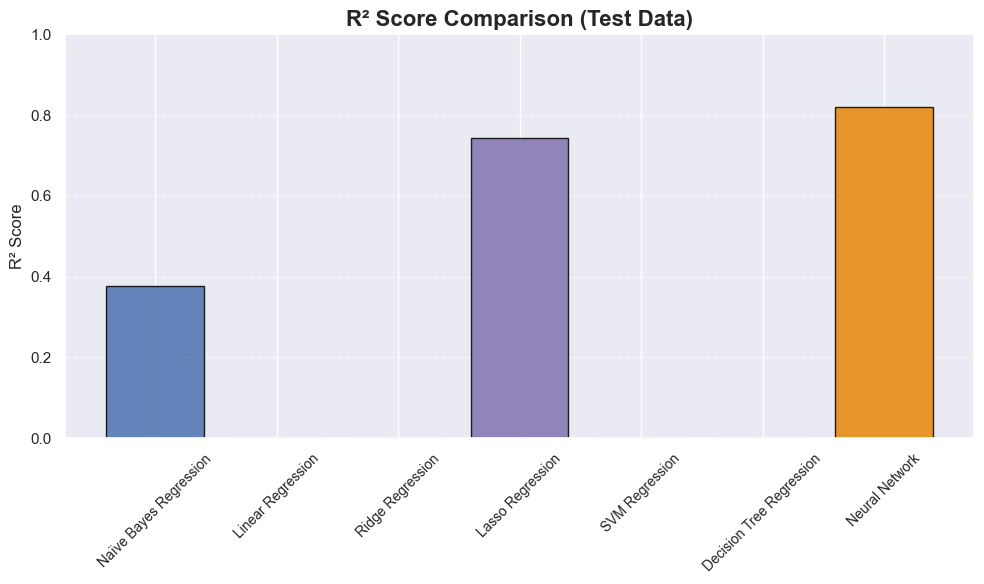

In [84]:
 # Plot R² Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R² Score (Test)"], color=colors, alpha=0.85, edgecolor='black')
plt.title("R² Score Comparison (Test Data)", fontsize=16, weight='bold')
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 1)  # R² Score is typically between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

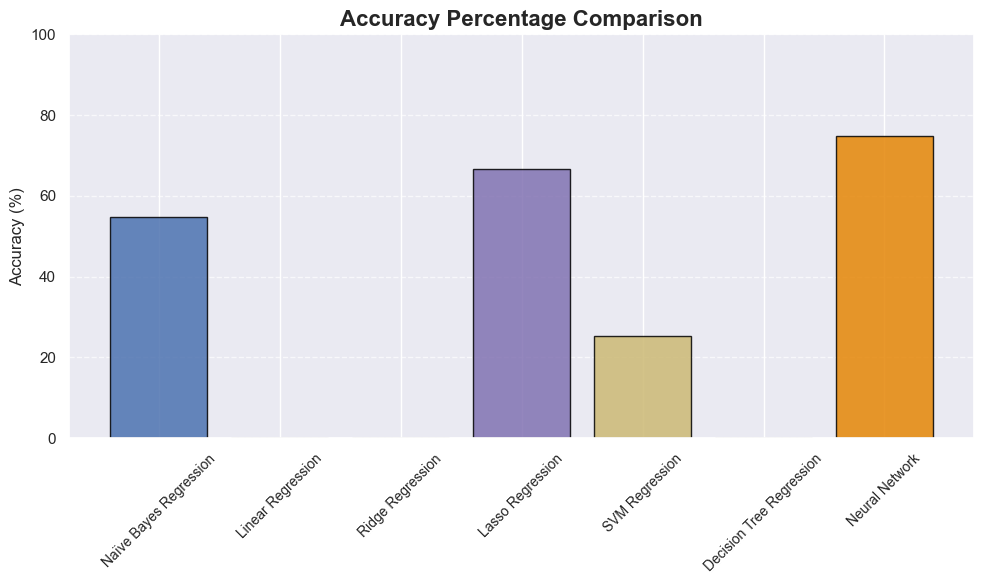

In [85]:

# Plot Accuracy Percentage
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy (%)"], color=colors, alpha=0.85, edgecolor='black')
plt.title("Accuracy Percentage Comparison", fontsize=16, weight='bold')
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0, 100)  # Accuracy percentages range from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
     

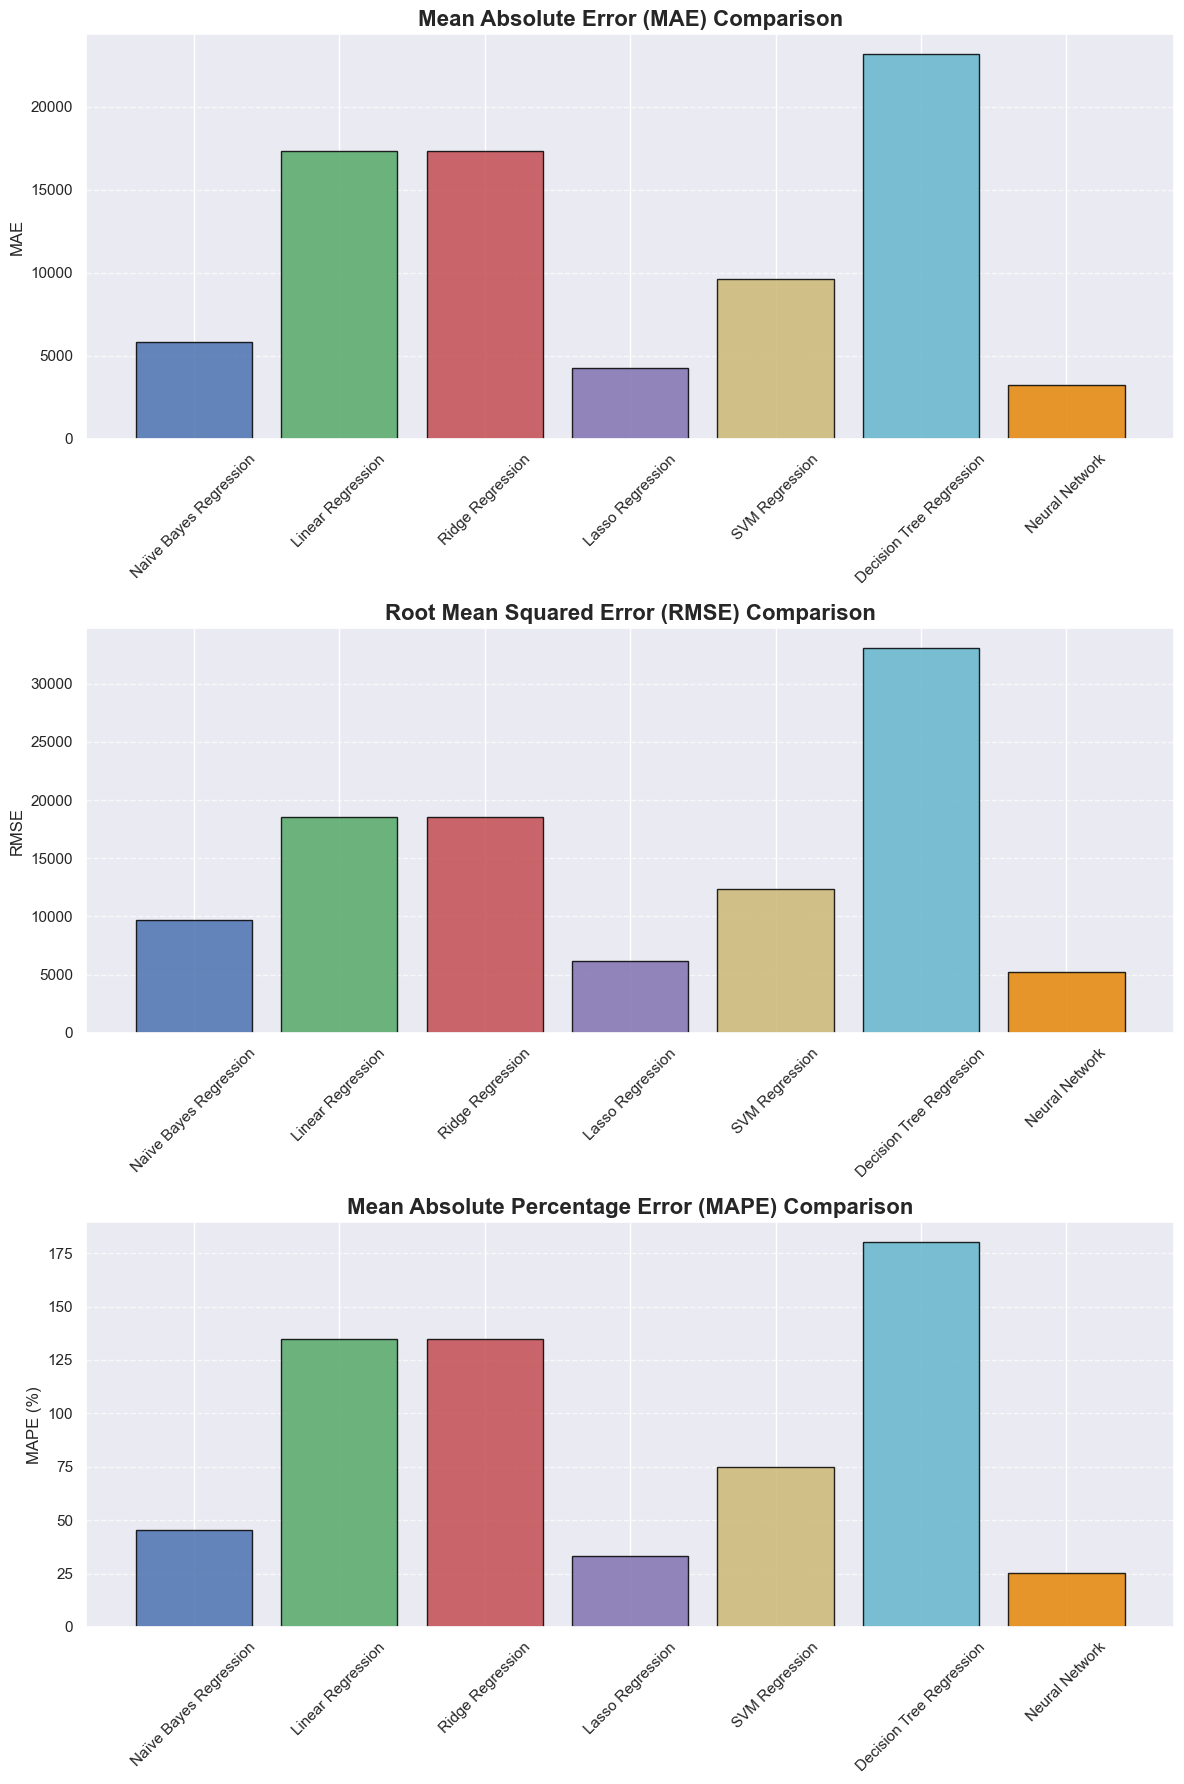

In [86]:
# Plot MAE, RMSE, and MAPE Comparison
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# MAE Plot
axs[0].bar(results_df["Model"], results_df["MAE"], color=colors, alpha=0.85, edgecolor='black')
axs[0].set_title("Mean Absolute Error (MAE) Comparison", fontsize=16, weight='bold')
axs[0].set_ylabel("MAE", fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', labelrotation=45)

# RMSE Plot
axs[1].bar(results_df["Model"], results_df["RMSE"], color=colors, alpha=0.85, edgecolor='black')
axs[1].set_title("Root Mean Squared Error (RMSE) Comparison", fontsize=16, weight='bold')
axs[1].set_ylabel("RMSE", fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].tick_params(axis='x', labelrotation=45)

# MAPE Plot
axs[2].bar(results_df["Model"], results_df["MAPE (%)"], color=colors, alpha=0.85, edgecolor='black')
axs[2].set_title("Mean Absolute Percentage Error (MAPE) Comparison", fontsize=16, weight='bold')
axs[2].set_ylabel("MAPE (%)", fontsize=12)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
axs[2].tick_params(axis='x', labelrotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()
     